In [1]:
!pip install kaggle    #to setup the kaggle resources.

    100% |████████████████████████████████| 51kB 1.9MB/s 
    100% |████████████████████████████████| 51kB 4.0MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /content/.cache/pip/wheels/56/65/d9/88f616157b8a1848ce77c35a398b09d0566ba1fd9cc34eaa03
Successfully built kaggle


Before Running the following code,Download the kaggle.json from kaggle website and place them inside your google drive.Then run the following code to establish the connection  to the Google drive.

In [2]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [3]:
!kaggle competitions download -c freesound-audio-tagging  #kaggle command to download the dataset.You will find this command in this competition site.

  0%|                                                | 0.00/449k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 449k/449k [00:00<00:00, 74.2MB/s]
  0%|                                                | 0.00/440k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 440k/440k [00:00<00:00, 64.9MB/s]
  0%|                                                | 0.00/321k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 321k/321k [00:00<00:00, 67.2MB/s]
  0%|                                                | 0.00/228k [00:00<?, ?B/s]
100%|█████████████████████████████████████████| 228k/228k [00:00<00:00, 117MB/s]
100%|█████████████████████████████████████▉| 3.27G/3.27G [01:28<00:00, 23.8MB/s]
100%|██████████████████████████████████████| 3.27G/3.27G [01:28<00:00, 39.8MB/s]
100%|█████████████████████████████████████▉| 3.79G/3.79G [02:44<00:00, 18.0MB/s]
100%|██████████████████████████████████████| 3.79G/3.79G [02:44<00:00, 24.7MB/s]


In [4]:
!ls  #check for the files

audio_test.zip	 sample_submission.csv	    train_post_competition.csv
audio_train.zip  test_post_competition.csv
datalab		 train.csv


In [0]:
import zipfile
zip_ref = zipfile.ZipFile('audio_train.zip', 'r')   #to extract the audio_train zip file
zip_ref.extractall()
zip_ref.close()

In [0]:
import zipfile
zip_ref = zipfile.ZipFile('audio_test.zip', 'r')   #to extract the audio_test zip file
zip_ref.extractall()
zip_ref.close()

In [7]:
!ls

audio_test	audio_train.zip        test_post_competition.csv
audio_test.zip	datalab		       train.csv
audio_train	sample_submission.csv  train_post_competition.csv


In [8]:
!pip install librosa  #command to install librosa audio preprocessing library

    100% |████████████████████████████████| 1.6MB 6.2MB/s 
    100% |████████████████████████████████| 276kB 9.3MB/s 
    100% |████████████████████████████████| 327kB 9.4MB/s 
    100% |████████████████████████████████| 1.9MB 7.0MB/s 
    100% |████████████████████████████████| 15.9MB 1.6MB/s 
  Running setup.py bdist_wheel for librosa ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/18/b8/10/f0f8f6ac60668a5cd75596cf14c25bb6b3ea1ecd815f058b7e
  Running setup.py bdist_wheel for audioread ... - done
  Stored in directory: /content/.cache/pip/wheels/53/02/90/7b5c4081b7470c550ab605f600bad237dde12a6b8999b11f50
  Running setup.py bdist_wheel for resampy ... - \ done
  Stored in directory: /content/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
Successfully built librosa audioread resampy


In [0]:
from os import listdir
from os.path import isfile,join

# We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display
import math

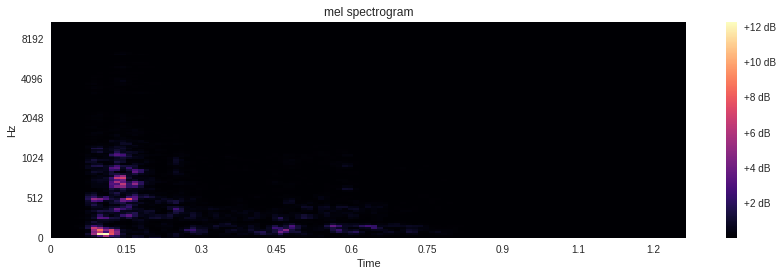

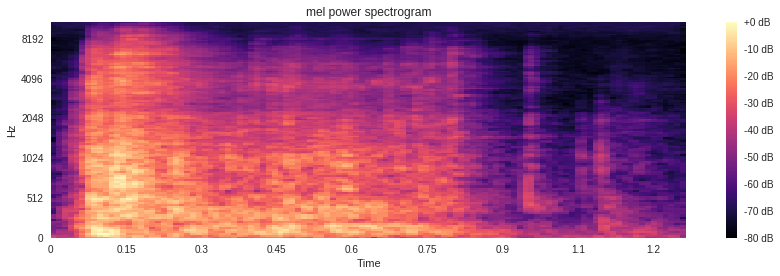

In [15]:
path="audio_train"
files=[f for f in listdir(path) if isfile(join(path,f))]
iter=0
for i in files:
  if(iter==0):
    audio_path=path+"/"+i
    y,sr=librosa.load(audio_path,sr=44100)  #each audio sampling rate is 44100Hz
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)  #to load 128 mel spectrogram image
    log_S = librosa.power_to_db(S, ref=np.max)     #log scale of mel spectrogram
    plt.figure(figsize=(12,4))
    librosa.display.specshow(S, sr=sr, x_axis='time',y_axis='mel')    # to display the mel spectrogram image
    plt.title('mel spectrogram')
    
    plt.colorbar(format='%+02.0f dB')
    
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12,4))
    librosa.display.specshow(log_S, sr=sr, x_axis='time',y_axis='mel')    # to display the mel spectrogram image with log scale
    plt.title('mel power spectrogram')
    
    plt.colorbar(format='%+02.0f dB')
    
    plt.tight_layout()
    plt.show()
    
    iter=iter+1
  else:
    break

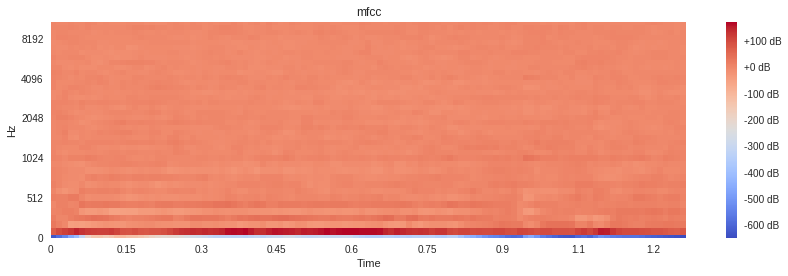

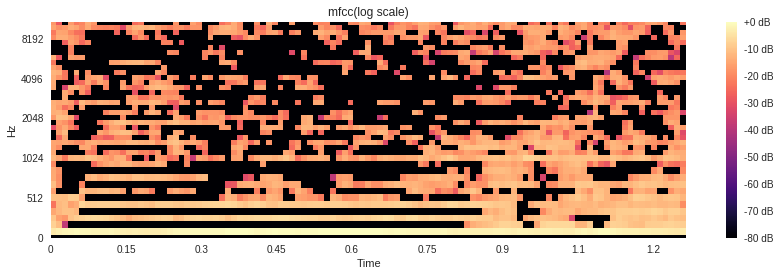

In [16]:
iter=0
for i in files:
  if(iter==0):
    audio_path=path+"/"+i
    y,sr=librosa.load(audio_path,sr=44100)  #each audio sampling rate is 44100Hz
    S = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40)  #to load 40 band mfcc
    log_S = librosa.power_to_db(S, ref=np.max)     #log scale of mfcc
    plt.figure(figsize=(12,4))
    librosa.display.specshow(S, sr=sr, x_axis='time',y_axis='mel')    # to display the mfcc
    plt.title('mfcc')
    
    plt.colorbar(format='%+02.0f dB')
    
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12,4))
    librosa.display.specshow(log_S, sr=sr, x_axis='time',y_axis='mel')  #to display the mfcc with log scale
    plt.title('mfcc(log scale)')
    
    plt.colorbar(format='%+02.0f dB')
    
    plt.tight_layout()
    plt.show()
    iter=iter+1
  else:
    break

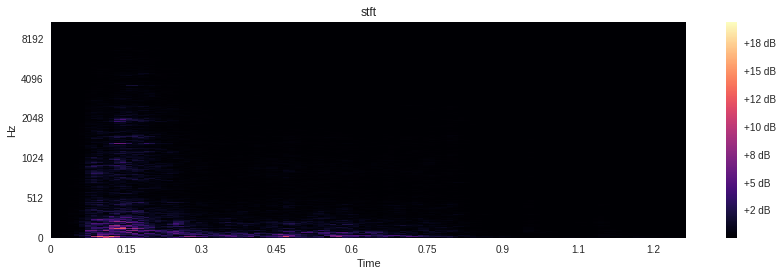

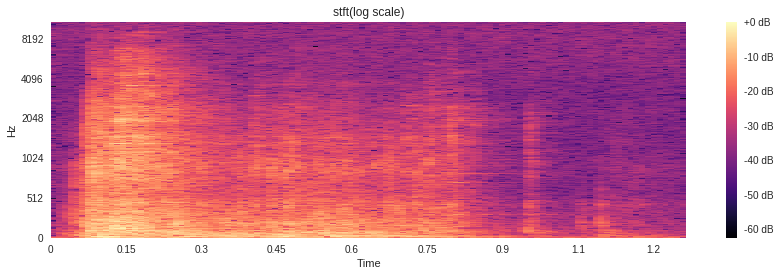

In [18]:
iter=0
for i in files:
  if(iter==0):
    audio_path=path+"/"+i
    y,sr=librosa.load(audio_path,sr=44100)  #each audio sampling rate is 44100Hz
    S = np.abs(librosa.stft(y))  #to load 40 band mfcc
    log_S = librosa.power_to_db(S, ref=np.max)     #log scale of mfcc
    plt.figure(figsize=(12,4))
    librosa.display.specshow(S, sr=sr, x_axis='time',y_axis='mel')    # to display the mfcc
    plt.title('stft')
    
    plt.colorbar(format='%+02.0f dB')
    
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12,4))
    librosa.display.specshow(log_S, sr=sr, x_axis='time',y_axis='mel')  #to display the mfcc with log scale
    plt.title('stft(log scale)')
    
    plt.colorbar(format='%+02.0f dB')
    
    plt.tight_layout()
    plt.show()
    iter=iter+1
  else:
    break

The following is a class implementation for audio preprocessing of all training images

In [0]:
from os import listdir
from os.path import isfile,join

# We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display
import math

class Collector:
  
  def __init__(self,pth,duration):
    

    self.myPath=pth
    self.iter=0
    self.liter=0
    self.duration=duration
    self.input_length=44100*self.duration   #input_length is audio sampling rate * audio_duration
    
    file = open('train.csv','r')     #train.csv loaded for creating vocabulary for labels
    self.vocab=[]
    words=set()
    j=0
    for i in file:
      if(j!=0):
        #print(i)
        ls=i.split(",")[1]
        words.add(ls)
      j=j+1
    #print(words)
    #print(len(words))
    self.all_words=sorted(list(words))
    self.vocab={ self.all_words[j]:j for j in range(0,len(self.all_words)) }
    print(self.vocab)
    file.close()
    
  def pad(self,a):              #this method is created at first for padding the spectogram audio files.
    if(a.shape[1]>1400):
        return a[:,0:1400]
    else:
        return np.pad(a,[(0,0),(0,(1400-a.shape[1]))],'constant',constant_values=(0))

    
  def next_batch(self,it):   #this method loads particular number of batches of training images at a time.
    onlyfiles = [f for f in sorted(listdir(self.myPath)) if isfile(join(self.myPath,f))]  #sorted order to access the training audio files.
    j=it
    max=0
    voc=dict()
    trainer=[]
    k=self.iter
    for i in onlyfiles:
        if(k>0):
          #print(self.iter)
          k=k-1
          continue
        audio_path=self.myPath+"/"+i
        data,sr=librosa.load(audio_path, sr=44100)
        
        # Random offset / Padding
        if len(data) > self.input_length:
            max_offset = len(data) - self.input_length
            #print(max_offset)
            offset = np.random.randint(max_offset)
            #print(offset)
            data = data[offset:(self.input_length+offset)]
        else:
            if self.input_length > len(data):
                max_offset = self.input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, self.input_length - len(data) - offset), "constant")
        #S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
        
        mfcc=librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40)
        
        #log_S = librosa.power_to_db(mfcc, ref=np.max)
        
        # Delta MFCC for different variation of model
        #delta_mfcc  = librosa.feature.delta(mfcc)
        #delta2_mfcc = librosa.feature.delta(mfcc, order=2)
        #print(log_S.shape)
        
        trainer.append(mfcc)
        j=j-1
        self.iter=self.iter+1
        if(j==0):
            break
     
    init=0
    label=[]
    temp=self.liter
    repeater=it
    file2 = open('train.csv','r')
    for iter in file2:
      if(init!=0):
        if(temp>0):
          temp=temp-1
          continue
        #print(iter.split(",")[0])
        name=iter.split(",")[1]
        label.append(self.vocab[name])
        repeater=repeater-1
        self.liter=self.liter+1
        if(repeater==0):
          break
      init=init+1

    label=np.array(label)
    #print(label.shape[0])
    label2=np.eye(len(self.all_words))[label]
    #print(label2.shape)
    file2.close()
    
    return np.array(trainer),label2
     

In [26]:
coll=Collector("audio_train",2)  #parameters are filepath and audio_duration
train,label=coll.next_batch(5)   #number of batch files to load

{'Acoustic_guitar': 0, 'Applause': 1, 'Bark': 2, 'Bass_drum': 3, 'Burping_or_eructation': 4, 'Bus': 5, 'Cello': 6, 'Chime': 7, 'Clarinet': 8, 'Computer_keyboard': 9, 'Cough': 10, 'Cowbell': 11, 'Double_bass': 12, 'Drawer_open_or_close': 13, 'Electric_piano': 14, 'Fart': 15, 'Finger_snapping': 16, 'Fireworks': 17, 'Flute': 18, 'Glockenspiel': 19, 'Gong': 20, 'Gunshot_or_gunfire': 21, 'Harmonica': 22, 'Hi-hat': 23, 'Keys_jangling': 24, 'Knock': 25, 'Laughter': 26, 'Meow': 27, 'Microwave_oven': 28, 'Oboe': 29, 'Saxophone': 30, 'Scissors': 31, 'Shatter': 32, 'Snare_drum': 33, 'Squeak': 34, 'Tambourine': 35, 'Tearing': 36, 'Telephone': 37, 'Trumpet': 38, 'Violin_or_fiddle': 39, 'Writing': 40}


In [27]:
print(train.shape)  #sample training image batch size for the mfcc

(5, 40, 173)


The following code demostrates loading the small batches of training images and concatenating them to negate the low hardware memory issues 

In [28]:
coll=Collector("audio_train",2)

{'Acoustic_guitar': 0, 'Applause': 1, 'Bark': 2, 'Bass_drum': 3, 'Burping_or_eructation': 4, 'Bus': 5, 'Cello': 6, 'Chime': 7, 'Clarinet': 8, 'Computer_keyboard': 9, 'Cough': 10, 'Cowbell': 11, 'Double_bass': 12, 'Drawer_open_or_close': 13, 'Electric_piano': 14, 'Fart': 15, 'Finger_snapping': 16, 'Fireworks': 17, 'Flute': 18, 'Glockenspiel': 19, 'Gong': 20, 'Gunshot_or_gunfire': 21, 'Harmonica': 22, 'Hi-hat': 23, 'Keys_jangling': 24, 'Knock': 25, 'Laughter': 26, 'Meow': 27, 'Microwave_oven': 28, 'Oboe': 29, 'Saxophone': 30, 'Scissors': 31, 'Shatter': 32, 'Snare_drum': 33, 'Squeak': 34, 'Tambourine': 35, 'Tearing': 36, 'Telephone': 37, 'Trumpet': 38, 'Violin_or_fiddle': 39, 'Writing': 40}


In [0]:
train1,label1=coll.next_batch(2000)

In [0]:
train2,label2=coll.next_batch(2000)

In [0]:
train3,label3=coll.next_batch(2000)

In [0]:
train4,label4=coll.next_batch(2000)

In [0]:
train5,label5=coll.next_batch(2000)

In [0]:
trainin=np.concatenate((train1,train2),axis=0)
labelin=np.concatenate((label1,label2),axis=0)

In [0]:
trainin2=np.concatenate((trainin,train3),axis=0)
labelin2=np.concatenate((labelin,label3),axis=0)

In [0]:
trainin3=np.concatenate((trainin2,train4),axis=0)
labelin3=np.concatenate((labelin2,label4),axis=0)

In [47]:
labelin3.shape

(8000, 41)

In [0]:
Train=np.concatenate((trainin3,train5),axis=0)
Label=np.concatenate((labelin3,label5),axis=0)

In [49]:
print(Train.shape)
print(Label.shape)

(9473, 40, 173)
(9473, 41)


In [0]:
Train=np.expand_dims(Train,axis=-1) #1 dimension is extended for the usage of convolution 2D to specify that there is one channel

In [51]:
print(Train.shape)
print(Label.shape)

(9473, 40, 173, 1)
(9473, 41)


Following are the necessary import packages for the keras model implementation

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Embedding,LSTM
from keras.layers import Lambda, Input
from keras.layers import Conv2D, GlobalAveragePooling2D,GlobalMaxPooling1D
from keras.optimizers import SGD,Adadelta,Adam
from keras.backend import tf as ktf
from keras.layers import (Convolution2D, GlobalAveragePooling2D, BatchNormalization, Flatten,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation)
from keras.utils import Sequence, to_categorical

In [53]:
model2 = Sequential()  
  
model2.add(Convolution2D(32, (4,10),padding="same",input_shape=(40,173,1)))  #Convolution 2D model with 32 filters and kernel size of (4,10)
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(MaxPool2D())

model2.add(Convolution2D(32, (4,10), padding="same"))                        #Convolution 2D model with 32 filters and kernel size of (4,10)
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(MaxPool2D())

model2.add(Convolution2D(32, (4,10), padding="same"))                        #Convolution 2D model with 32 filters and kernel size of (4,10)
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(MaxPool2D())

model2.add(Convolution2D(32, (4,10), padding="same"))                        #Convolution 2D model with 32 filters and kernel size of (4,10)
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(MaxPool2D())

model2.add(Flatten())
model2.add(Dense(64))                                                       #Feed Forwared network with 64 hidden nodes 
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(Dense(41, activation="softmax"))                                 #Softmax activation function for classifying into 41 different classes

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)                 #SGD optimization with nestrov momentum
#adadelta=Adadelta()                                                        #Ada delta Optimization
adam=Adam()                                                                 #Adam optimization
model2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 40, 173, 32)       1312      
_________________________________________________________________
batch_normalization_1 (Batch (None, 40, 173, 32)       128       
_________________________________________________________________
activation_1 (Activation)    (None, 40, 173, 32)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 86, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 86, 32)        40992     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 86, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 20, 86, 32)        0         
__________

In [57]:
model2.fit(Train,Label,epochs=25,batch_size=32)

Epoch 1/25
 224/9473 [..............................] - ETA: 8:07 - loss: 3.0748 - acc: 0.1607

KeyboardInterrupt: ignored